# 0) Import Packages

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
from scipy.misc import derivative
from scipy.ndimage import gaussian_filter1d
from scipy.signal import butter, filtfilt
from matplotlib.widgets import Slider
from IPython.html.widgets import interact, fixed 
from ipywidgets import interact, fixed
import ipywidgets as widgets
import ipywidgets as widgets
import os
import io 
import pandas as pd
import sys
import glob #glob is helpful for searching for filenames or directories
#import ddm_clean as ddm #this is the module containing the differential dynamic microscopy code
#import tiff_file
import scipy #scientific python
from scipy.special import gamma
import pickle #for saving data

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\ProgramData\Anaconda2\lib\runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "C:\ProgramData\Anaconda2\lib\runpy.py", line 72, in _run_code
    exec code in run_globals
  File "C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\Anaconda2\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\kernelapp.py", line 499, in start
    self.io_loop.start()
  File "

In [2]:
from collections import defaultdict
import numpy as np

from nptdms import scaling, types
from nptdms.utils import Timer, OrderedDict, cached_property
from nptdms.log import log_manager
from nptdms.common import ObjectPath
from nptdms.reader import TdmsReader
from nptdms.channel_data import get_data_receiver, slice_raw_data
from nptdms.export import hdf_export, pandas_export
from nptdms.base_segment import RawChannelDataChunk
from nptdms.timestamp import TdmsTimestamp, TimestampArray

In [3]:
import numpy as np
from nptdms import TdmsFile
from nptdms import tdms
from nptdms import TdmsFile

In [4]:
CL_AMT='W:\\Gregor L\\OT data\\6-2-21 CL AMT\\nonlinear (20 beads, 10-10um, 20 sec per trial)'
trial = '\\Trial_3.tdms'

In [5]:
#CL_AMT+trial
tdms_file = TdmsFile.read(CL_AMT+trial)
group = tdms_file["Aquire_Robert"]
PSDx = group["Voltage"]
PSDy = group["Voltage_0"]
stg_x = group["Voltage_3"]
stg_y = group["Voltage_4"]

'all_force_x = np.append(all_force_x, force_x, 1)\n    errorforce[i] = ((np.std(force_x)/(np.sqrt(Maxtrials))))\n    #sum_errorforce = sum_errorforce + errorforce\n    sum_PSDx = sum_PSDx + PSDx_smooth\n    sum_force_x = sum_force_x + force_x'

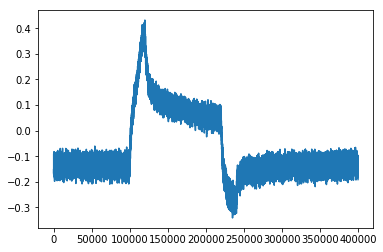

In [6]:
plt.figure()
plt.plot(PSDx)

"""all_force_x = np.append(all_force_x, force_x, 1)
    errorforce[i] = ((np.std(force_x)/(np.sqrt(Maxtrials))))
    #sum_errorforce = sum_errorforce + errorforce
    sum_PSDx = sum_PSDx + PSDx_smooth
    sum_force_x = sum_force_x + force_x"""

In [6]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filtfilt(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y
cutoff = 2000
fs = 9000000

def smooth(a,WSZ):
    # a: NumPy 1-D array containing the data to be smoothed
    # WSZ: smoothing window size needs, which must be odd number, as in the original MATLAB implementation
    out0 = np.convolve(a,np.ones(WSZ,dtype=int),'valid')/WSZ    
    r = np.arange(1,WSZ-1,2)
    start = np.cumsum(a[:WSZ-1])[::2]/r
    stop = (np.cumsum(a[:-WSZ:-1])[::2]/r)[::-1]
    return np.concatenate((  start , out0, stop  ))

def annot_max(x,y, ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= "x={:.3}, y={:.3}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=0")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)

def deriv(x):
    return derivative(function, x)

<IPython.core.display.Javascript object>


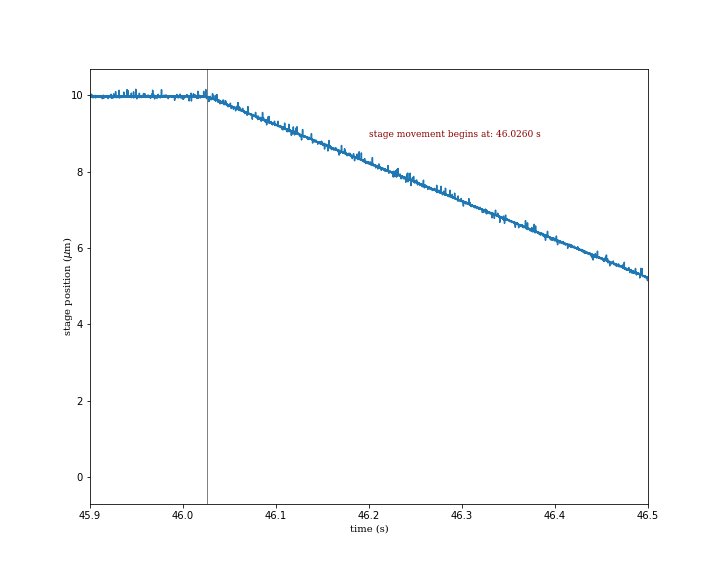

[0, 46.026, 0, 0, 0, 0, 0, 0, 0, 0, 0, 46.026, 0, 0, 0, 0, 0, 0, 0, 0, 0, 46.026, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [163]:
trial_num = 12
mstart = 46.026
zoom_i = 45.9
zoom_f = 46.5

trial = '\\Trial_'+str(trial_num)+'.tdms'
tdms_file = TdmsFile.read(exp+trial)
group = tdms_file["Aquire_Robert"]
stg_x = group["Voltage_3"]
for i in range(len(stg_x)):
    a_stg_x[i] = (stg_x[i] *5.0979) +25.4895
    
%matplotlib notebook
all_mstart[trial_num-1] = mstart
fig = plt.figure(figsize=(10,8));
ax = plt.gca()
ax.axvline(x=mstart, color='black', linewidth='0.5')
ax.plot(Time, a_stg_x)
plt.xlim(zoom_i, zoom_f)
ax.set_ylabel("stage position ($\mu$m$^{}$)", fontdict=font_plt_ax, labelpad=-5)
ax.set_xlabel("time (s)", fontdict=font_plt_ax)
ax.text(0.5,0.85,'stage movement begins at: %.4f s' % mstart, fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
print(all_mstart)

In [164]:
exp='W:\\Gregor L\\OT data\\6-23-21 3chamber Kai\\nonlinear'

Maxtrials = 11
aqrate = 20000
exp_time= 55 
pre = 6.02
post = 46.026
Trap_Stiffness=45
distance = 10

In [167]:
DataLength = aqrate*exp_time
pre_data = int(aqrate*pre)
post_data = int(aqrate*post)
Time = np.linspace(0,exp_time, DataLength)

Stg_X = np.zeros(DataLength)
Stg_Y = np.zeros(DataLength)

PSD_X = np.zeros(DataLength)
PSD_Y = np.zeros(DataLength)
#PSD_strain = np.zeros(len(Time[pre_data:post_data]))
sum_PSDx = (np.zeros(DataLength))*Maxtrials

Force_X = np.zeros(DataLength)
all_force_x = np.zeros(Maxtrials)
Force_Y = np.zeros(DataLength)
errorforce = np.zeros(DataLength)
sum_force_x = (np.zeros(DataLength))*Maxtrials
sum_errorforce = (np.zeros(DataLength))*Maxtrials

all_xmax = [0] * 11

#* plotting parameters    
font_plt = {'family': 'serif',
         'color':  'darkred',
         'weight': 'normal',
         'size': 9,
         }
font_plt_ax = {'family': 'serif',
            'color':  'black',
            'weight': 'normal',
            'size': 10,
            }

<IPython.core.display.Javascript object>


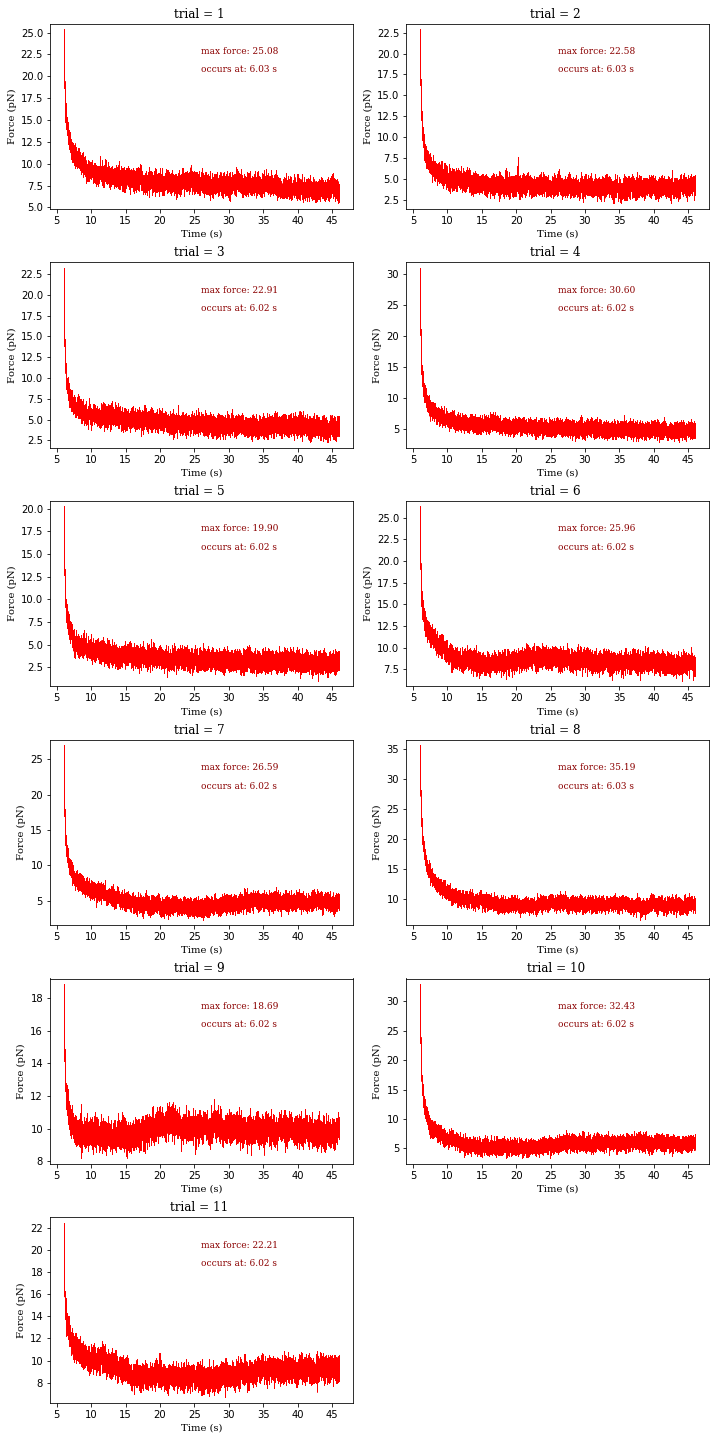

[6.025605477823162, 6.025105477368616, 6.020955473595885, 6.019955472686793, 6.023055475504978, 6.019955472686793, 6.0243554766867975, 6.0254054776413435, 6.019955472686793, 6.022055474595886, 6.022405474914068]
25.649034584603772


In [169]:
%matplotlib notebook
plt.figure(figsize=(10,20))
all_ymax = 0
for i in range(1,12):
    trial = '\\Trial_'+str(i)+'.tdms'
    tdms_file = TdmsFile.read(exp+trial)
    group = tdms_file["Aquire_Robert"]
    PSDx = group["Voltage"]
    PSDx_smooth = gaussian_filter1d((PSDx - np.mean(PSDx[1:2000])), sigma=50)
    #PSD_strain = PSDx_smooth[pre_data:post_data]
    force_x = Trap_Stiffness * PSDx_smooth
    
    pltforce_x = force_x[pre_data:post_data]
    pltTime = Time[pre_data:post_data]
    ax = plt.subplot(6,2,i)
    ax.plot(pltTime,pltforce_x,'r|',alpha=0.4)
    xmax = pltTime[np.argmax(pltforce_x)]
    all_xmax[i-1] = xmax
    ymax = pltforce_x.max()
    all_ymax = all_ymax + ymax
    xmin = pltTime[np.argmin(pltforce_x)]
    ymin = pltforce_x.min()
    ax.text(0.5,0.75,'occurs at: %.2f s' % xmax,
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.text(0.5,0.85,'max force: %.2f' % ymax, 
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    #ax.text(0.03,0.50,'occurs at: %.2f s' % xmin,
            #fontdict=font_plt,horizontalalignment='left', 
            #verticalalignment='center', transform=ax.transAxes)
    #ax.text(0.03,0.60,'min force: %.2f' % ymin, 
            #fontdict=font_plt,horizontalalignment='left', 
            #verticalalignment='center', transform=ax.transAxes)
    #annot_max(Time,force_x)
    #annot_min(Time,force_x)
    ax.set_xlabel("Time (s)", fontdict=font_plt_ax, fontsize=10)
    ax.set_ylabel("Force (pN)", fontdict=font_plt_ax, fontsize=10)
    ax.set_title("trial = " +str(i)+" ", fontdict=font_plt_ax, fontsize=12)
    plt.tight_layout(pad=0.75)
print(all_xmax)
avg_ymax = all_ymax/11
print(avg_ymax)

<IPython.core.display.Javascript object>


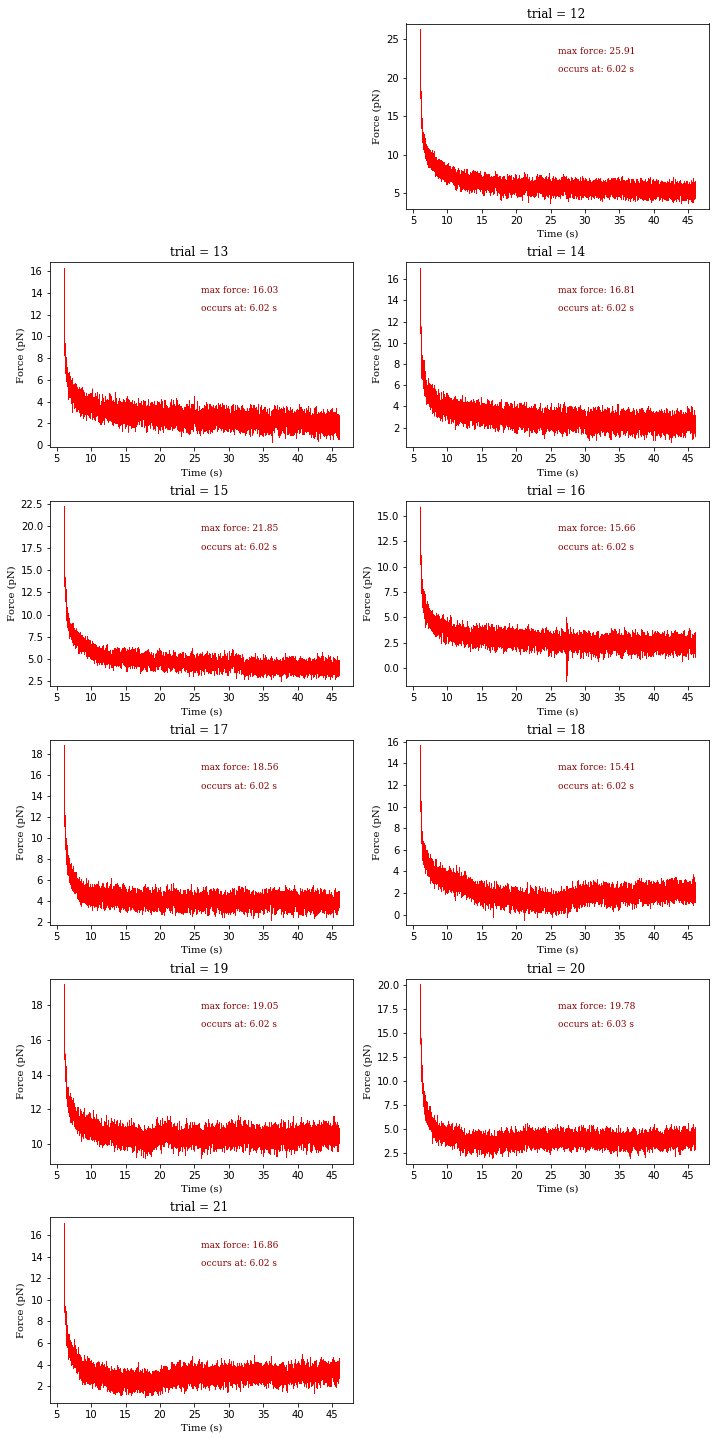

18.59228597651723


In [170]:
%matplotlib notebook
plt.figure(figsize=(10,20))
all_ymax2 = 0
for i in range(2,12):
    trial = '\\Trial_'+str(i+10)+'.tdms'
    tdms_file = TdmsFile.read(exp+trial)
    group = tdms_file["Aquire_Robert"]
    PSDx = group["Voltage"]
    PSDx_smooth = gaussian_filter1d((PSDx - np.mean(PSDx[1:2000])), sigma=50)
    force_x = Trap_Stiffness * PSDx_smooth
    
    pltforce_x = force_x[pre_data:post_data]
    pltTime = Time[pre_data:post_data]
    ax = plt.subplot(6,2,i)
    ax.plot(pltTime,pltforce_x,'r|',alpha=0.4)
    xmax = pltTime[np.argmax(pltforce_x)]
    all_xmax[i-1] = xmax
    ymax = pltforce_x.max()
    all_ymax2 = all_ymax2 + ymax
    ax.text(0.5,0.75,'occurs at: %.2f s' % xmax,
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.text(0.5,0.85,'max force: %.2f' % ymax, 
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.set_xlabel("Time (s)", fontdict=font_plt_ax, fontsize=10)
    ax.set_ylabel("Force (pN)", fontdict=font_plt_ax, fontsize=10)
    ax.set_title("trial = " +str(i+10)+" ", fontdict=font_plt_ax, fontsize=12)
    plt.tight_layout(pad=0.75)
    
avg_ymax2 = all_ymax2/10
print(avg_ymax2)

<IPython.core.display.Javascript object>


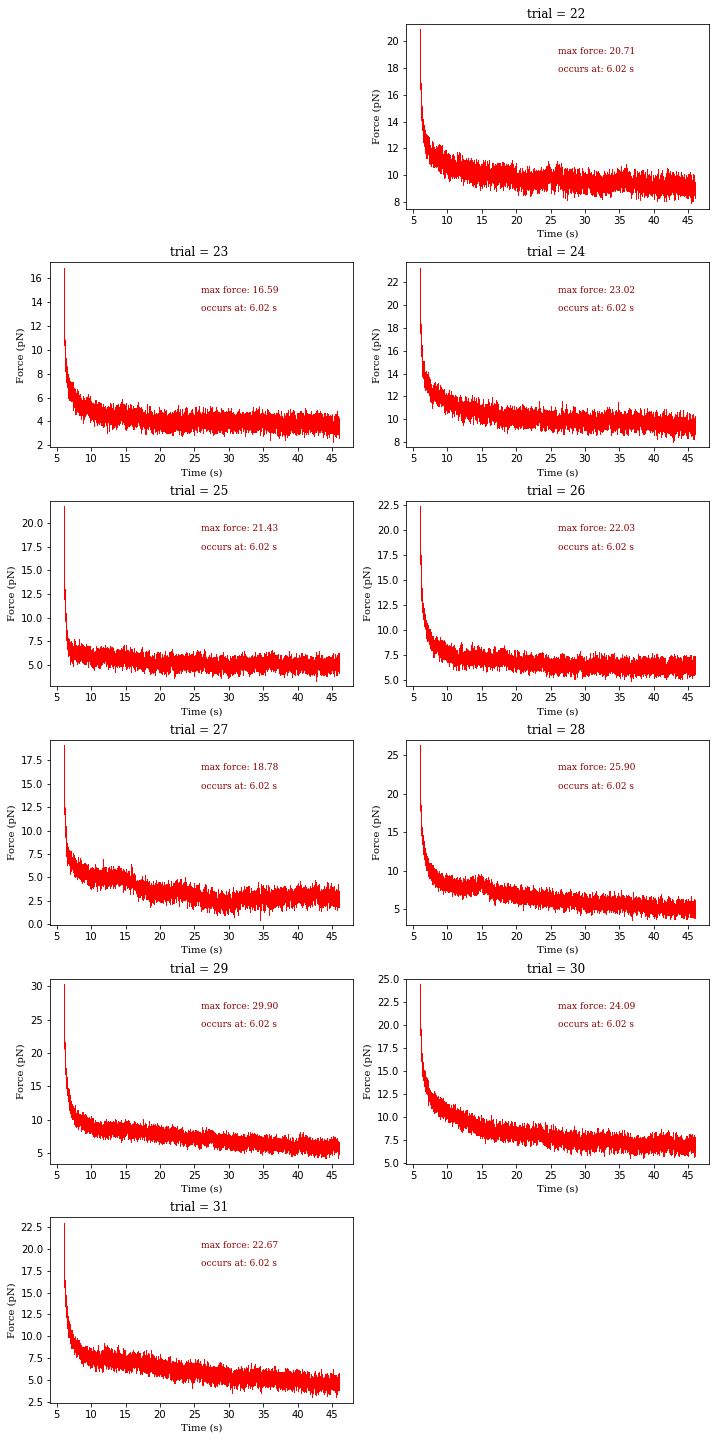

22.51252220365223


In [171]:
%matplotlib notebook
plt.figure(figsize=(10,20))
all_ymax3 = 0
for i in range(2,12):
    trial = '\\Trial_'+str(i+20)+'.tdms'
    tdms_file = TdmsFile.read(exp+trial)
    group = tdms_file["Aquire_Robert"]
    PSDx = group["Voltage"]
    PSDx_smooth = gaussian_filter1d((PSDx - np.mean(PSDx[1:2000])), sigma=50)
    force_x = Trap_Stiffness * PSDx_smooth
    
    pltforce_x = force_x[pre_data:post_data]
    pltTime = Time[pre_data:post_data]
    ax = plt.subplot(6,2,i)
    ax.plot(pltTime,pltforce_x,'r|',alpha=0.4)
    xmax = pltTime[np.argmax(pltforce_x)]
    all_xmax[i-1] = xmax
    ymax = pltforce_x.max()
    all_ymax3 = all_ymax3 + ymax
    ax.text(0.5,0.75,'occurs at: %.2f s' % xmax,
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.text(0.5,0.85,'max force: %.2f' % ymax, 
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.set_xlabel("Time (s)", fontdict=font_plt_ax, fontsize=10)
    ax.set_ylabel("Force (pN)", fontdict=font_plt_ax, fontsize=10)
    ax.set_title("trial = " +str(i+20)+" ", fontdict=font_plt_ax, fontsize=12)
    plt.tight_layout(pad=0.75)
    
avg_ymax3 = all_ymax3/10
print(avg_ymax3)

In [172]:
a_stg_x = np.zeros(DataLength)
all_mstart = [0] * 31

font_plt = {'family': 'serif',
         'color':  'darkred',
         'weight': 'normal',
         'size': 13,}
font_plt1 = {'family': 'serif',
         'color':  'blue',
         'weight': 'normal',
         'size': 13,}
font_plt2 = {'family': 'serif',
         'color':  'red',
         'weight': 'normal',
         'size': 13,}
font_plt3 = {'family': 'serif',
         'color':  'green',
         'weight': 'normal',
         'size': 13,}

In [173]:
folder = '6-23-21 3chamber Kai'
exp='W:\\Gregor L\\OT data\\'+folder+'\\nonlinear'

Maxtrials = 10
aqrate = 20000
exp_time= 55 
start_t = 6.02
end_t = 46.026
Trap_Stiffness=45
distance = 10

In [174]:
PSD_X = np.zeros(DataLength)
sum_PSDx = (np.zeros(DataLength))*Maxtrials
start = int(aqrate*start_t)
end = int(aqrate*end_t)
cut = DataLength-end

sum_PSDx = (np.zeros(DataLength))*Maxtrials
force_x = np.zeros(int(DataLength-start-cut))
sum_force_x = (np.zeros(int(DataLength-start-cut)))*Maxtrials

Time = np.linspace(0,exp_time, DataLength)

In [175]:
PSD_X = 0
sum_PSDx = 0
force_X = 0 
sum_force_x = 0

for i in range(2,12):
    trial = '\\Trial_'+str(i)+'.tdms'
    tdms_file = TdmsFile.read(exp+trial)
    group = tdms_file["Aquire_Robert"]
    PSDx = group["Voltage"]
    PSDx_smooth = gaussian_filter1d((PSDx - np.mean(PSDx[1:2000])), sigma=50)
    start = int(aqrate*start_t)
    end = int(aqrate*end_t)
    force_x = Trap_Stiffness * PSDx_smooth[start:end]
    sum_PSDx = sum_PSDx + PSDx_smooth
    sum_force_x = sum_force_x + force_x


avg_PSDx_EA = (sum_PSDx/Maxtrials)*1
avg_force_x_EA = (sum_force_x/Maxtrials)*1

In [176]:
PSD_X = 0
sum_PSDx = 0
force_X = 0 
sum_force_x = 0

for i in range(12,22):
    trial = '\\Trial_'+str(i)+'.tdms'
    tdms_file = TdmsFile.read(exp+trial)
    group = tdms_file["Aquire_Robert"]
    PSDx = group["Voltage"]
    PSDx_smooth = gaussian_filter1d((PSDx - np.mean(PSDx[1:2000])), sigma=50)
    start = int(aqrate*start_t)
    end = int(aqrate*end_t)
    force_x = Trap_Stiffness * PSDx_smooth[start:end]
    sum_PSDx = sum_PSDx + PSDx_smooth
    sum_force_x = sum_force_x + force_x


avg_PSDx_noKC = (sum_PSDx/Maxtrials)*1
avg_force_x_noKC = (sum_force_x/Maxtrials)*1

In [177]:
PSD_X = 0
sum_PSDx = 0
force_X = 0 
sum_force_x = 0

for i in range(22,32):
    trial = '\\Trial_'+str(i)+'.tdms'
    tdms_file = TdmsFile.read(exp+trial)
    group = tdms_file["Aquire_Robert"]
    PSDx = group["Voltage"]
    PSDx_smooth = gaussian_filter1d((PSDx - np.mean(PSDx[1:2000])), sigma=50)
    start = int(aqrate*start_t)
    end = int(aqrate*end_t)
    force_x = Trap_Stiffness * PSDx_smooth[start:end]
    sum_PSDx = sum_PSDx + PSDx_smooth
    sum_force_x = sum_force_x + force_x


avg_PSDx_AE = (sum_PSDx/Maxtrials)*1
avg_force_x_AE = (sum_force_x/Maxtrials)*1

<IPython.core.display.Javascript object>


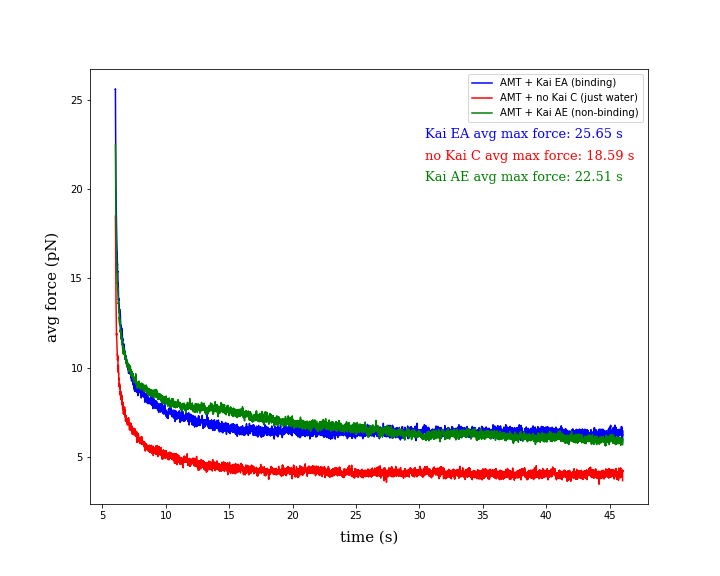

In [181]:
%matplotlib notebook
font_plt_ax = {'family': 'serif',
         'color':  'black',
         'weight': 'normal',
         'size': 15,}

fig = plt.figure(figsize=(10,8));
ax = plt.gca()
ax.plot(Time[start:end], avg_force_x_EA, color='blue', label='AMT + Kai EA (binding)')
ax.plot(Time[start:end], avg_force_x_noKC, color='red', label='AMT + no Kai C (just water)')
ax.plot(Time[start:end], avg_force_x_AE, color='green', label='AMT + Kai AE (non-binding)')
ax.set_ylabel("avg force (pN)", fontdict=font_plt_ax, labelpad=10)
ax.set_xlabel("time (s)", fontdict=font_plt_ax, labelpad=10)
ax.text(0.6,0.85,'Kai EA avg max force: %.2f s' % avg_ymax,
            fontdict=font_plt1,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
ax.text(0.6,0.80,'no Kai C avg max force: %.2f s' % avg_ymax2,
            fontdict=font_plt2,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
ax.text(0.6,0.75,'Kai AE avg max force: %.2f s' % avg_ymax3,
            fontdict=font_plt3,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
plt.legend()
plt.show()

t_data = Time[start:end]
EA_data = avg_force_x_EA
noKC_data = avg_force_x_noKC
AE_data = avg_force_x_AE

#* this "savetxt" saves the ISF data to seperate csv files; use this data to make plots in origin
np.savetxt('//Rae-40TB/AndersonLab-2020//Gregor L//OT data//data for origin//'+folder+'/avg_force_comparison.csv', np.c_[t_data, EA_data, noKC_data, AE_data], delimiter=',')

In [182]:
new_saveto= 'W:\\Gregor L\\summer 2021\\OT data figures\\'+folder+'\\'
filename= 'avg_relaxation_comparison'  
plt.savefig(new_saveto+filename+'_7-14-21.png')

In [41]:
CL_AMT='W:\\Gregor L\\OT data\\6-2-21 CL AMT\\nonlinear (20 beads, 10-10um, 20 sec per trial)'
## PSD_X = np.zeros(DataLength)
sum_PSDx = (np.zeros(DataLength))*Maxtrials
force_x = np.zeros(int(DataLength-start-cut))
sum_force_x = (np.zeros(int(DataLength-start-cut)))*Maxtrials

PSD_XCL = np.zeros(DataLength)
sum_PSDxCL = (np.zeros(DataLength))*Maxtrials
force_xCL = np.zeros(int(DataLength-start-cut))
sum_force_xCL = (np.zeros(int(DataLength-start-cut)))*Maxtrials

for i in range(1,11):
    trial = '\\Trial_'+str(i)+'.tdms'
    tdms_file = TdmsFile.read(exp+trial)
    group = tdms_file["Aquire_Robert"]
    PSDx = group["Voltage"]
    PSDx_smooth = gaussian_filter1d((PSDx - np.mean(PSDx[1:2000])), sigma=50)
    start = int(aqrate*5.02)
    end = int(aqrate*6)
    force_x = Trap_Stiffness * PSDx_smooth[start:end]
    sum_PSDx = sum_PSDx + PSDx_smooth
    sum_force_x = sum_force_x + force_x

for i in range(1,Maxtrials+1):
    trial = '\\Trial_'+str(i)+'.tdms'
    tdms_file = TdmsFile.read(CL_AMT+trial)
    group = tdms_file["Aquire_Robert"]
    PSDxCL = group["Voltage"]
    PSDx_smooth = gaussian_filter1d((PSDxCL - np.mean(PSDx[1:2000])), sigma=50)
    end = int(aqrate*all_xmax[i-1])
    force_xCL = Trap_Stiffness * PSDx_smooth[start:end]
    sum_PSDxCL = sum_PSDxCL + PSDx_smooth
    if len(sum_force_xCL) < len(force_xCL):
        c = force_xCL.copy()
        c[:len(sum_force_xCL)] += sum_force_xCL
        #sum_force_xCL = sum_force_xCL + c
    else:
        c = sum_force_xCL.copy()
        c[:len(force_xCL)] += force_xCL
        #sum_force_xCL = sum_force_xCL + c    

avg_PSDx = (sum_PSDx/Maxtrials)*1
avg_force_x = (sum_force_x/Maxtrials)*1
avg_PSDxCL = (sum_PSDxCL/Maxtrials)*1
avg_force_xCL = (sum_force_xCL/Maxtrials)*1
t_end= len(avg_force_x)
print(t_end)
%matplotlib notebook
"""plt.figure(figsize=(10,8))
plt.plot(Time[start:end], avg_force_x, color='blue', label='non-crosslinked')
plt.plot(Time[start:end], avg_force_xCL, color='green', label='crosslinked')
plt.xlabel('time (s)')
plt.ylabel('avg force (pN)')"""

font_plt_ax = {'family': 'serif',
         'color':  'darkred',
         'weight': 'normal',
         'size': 25,}

fig = plt.figure(figsize=(10,8));
ax = plt.gca()
ax.plot(Time[start:t_end], avg_force_x, color='blue', label='non-crosslinked')
ax.plot(Time[start:int(np.shape(avg_force_xCL))], avg_force_xCL, color='green', label='crosslinked')
ax.set_ylabel("avg force (pN)", fontdict=font_plt_ax, labelpad=-5)
ax.set_xlabel("time (s)", fontdict=font_plt_ax)
plt.legend()
plt.show()
#plt.ylim(0, 50)

ValueError: operands could not be broadcast together with shapes (1100000,) (1200000,) 

In [120]:
new_saveto= 'W:\\Gregor L\\summer 2021\\OT data figures\\'
filename= 'crosslinked_vs_noncrosslinked_eg'  
plt.savefig(new_saveto+filename+'_ISF fits.png')

In [ ]:
exp='W:\\Gregor L\\OT data\\6-2-21 nonCL AMT\\nonlinear (20 beads, 10-10um, 20 sec per trial)'
PSD_X = np.zeros(DataLength)
PSD_XCL = np.zeros(DataLength)
sum_PSDx = (np.zeros(DataLength))*Maxtrials
sum_PSDxCL = (np.zeros(DataLength))*Maxtrials
start = int(aqrate*5.02)
end = int(aqrate*5.6)
cut = DataLength-end

force_X = np.zeros(int(DataLength-start-cut))
force_XCL = np.zeros(DataLength)
sum_force_x = (np.zeros(int(DataLength-start-cut)))*Maxtrials
sum_force_xCL = (np.zeros(DataLength))*Maxtrials
    
Time = np.linspace(0,exp_time, DataLength)

In [ ]:
PSD_X = np.zeros(DataLength)
sum_PSDx = (np.zeros(DataLength))*Maxtrials
force_x = np.zeros(int(DataLength-start-cut))
sum_force_x = (np.zeros(int(DataLength-start-cut)))*Maxtrials

PSD_XCL = np.zeros(DataLength)
sum_PSDxCL = (np.zeros(DataLength))*Maxtrials
force_xCL = np.zeros(int(DataLength-start-cut))
sum_force_xCL = (np.zeros(int(DataLength-start-cut)))*Maxtrials

for i in range(2,11):
    trial = '\\Trial_'+str(i)+'.tdms'
    tdms_file = TdmsFile.read(exp+trial)
    group = tdms_file["Aquire_Robert"]
    PSDx = group["Voltage"]
    PSDx_smooth = gaussian_filter1d((PSDx - np.mean(PSDx[1:2000])), sigma=50)
    force_x = Trap_Stiffness * PSDx_smooth[start:end]
    sum_PSDx = sum_PSDx + PSDx_smooth
    sum_force_x = sum_force_x + force_x

for i in range(1,Maxtrials+1):
    trial = '\\Trial_'+str(i)+'.tdms'
    tdms_file = TdmsFile.read(CL_AMT+trial)
    group = tdms_file["Aquire_Robert"]
    PSDxCL = group["Voltage"]
    PSDx_smooth = gaussian_filter1d((PSDxCL - np.mean(PSDx[1:2000])), sigma=50)
    force_xCL = Trap_Stiffness * PSDx_smooth[start:end]
    sum_PSDxCL = sum_PSDxCL + PSDx_smooth
    sum_force_xCL = sum_force_xCL + force_xCL    

avg_PSDx = (sum_PSDx/Maxtrials)*1
avg_force_x = (sum_force_x/Maxtrials)*1
avg_PSDxCL = (sum_PSDxCL/Maxtrials)*1
avg_force_xCL = (sum_force_xCL/Maxtrials)*1
%matplotlib notebook
plt.figure(figsize=(10,8))
plt.plot(Time[start:end], avg_force_x, color='blue', label='non-crosslinked')
plt.plot(Time[start:end], avg_force_xCL, color='green', label='crosslinked')
plt.xlabel('time (s)')
plt.ylabel('avg force (pN)')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


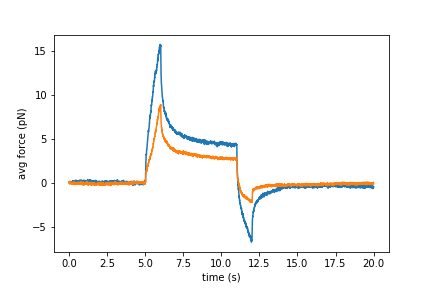

Text(0,0.5,'avg force (pN)')

In [53]:
exp='W:\\Gregor L\\OT data\\6-2-21 CL AMT\\nonlinear (20 beads, 10-10um, 20 sec per trial)'

Maxtrials = 15 
aqrate = 20000
exp_time= 20 
DataLength =(aqrate*exp_time) 
Trap_Stiffness=45;

PSD_X = np.zeros(DataLength)
PSD_XCL = np.zeros(DataLength)
sum_PSDx = (np.zeros(DataLength))*Maxtrials
sum_PSDxCL = (np.zeros(DataLength))*Maxtrials

Force_X = np.zeros(DataLength)
Force_XCL = np.zeros(DataLength)
sum_force_x = (np.zeros(DataLength))*Maxtrials
sum_force_xCL = (np.zeros(DataLength))*Maxtrials
    
Time = np.linspace(0,exp_time, DataLength)

cutoff = 20000
fs = 50000000

for i in range(1,Maxtrials+1):
    trial = '\\Trial_'+str(i)+'.tdms'
    tdms_file = TdmsFile.read(CL_AMT+trial)
    group = tdms_file["Aquire_Robert"]
    PSDxCL = group["Voltage"]
    PSDx_smoothCL = gaussian_filter1d((PSDxCL - np.mean(PSDxCL[1:2000])), sigma=50)
    #PSDx_smooth = butter_lowpass_filtfilt((PSD_X - np.mean(PSD_X[1:2000])), cutoff, fs)
    #PSDx_smooth = np.smoothdata((PSD_X - mean(PSD_X[1:2000]), 1, 'gaussian', 500))
    force_xCL = Trap_Stiffness * PSDx_smoothCL
    sum_PSDxCL = sum_PSDxCL + PSDx_smoothCL
    sum_force_xCL = sum_force_xCL + force_xCL
    
avg_PSDxCL = (sum_PSDxCL/Maxtrials)*1
avg_force_xCL = (sum_force_xCL/Maxtrials)*1

for i in range(2,11):
    trial = '\\Trial_'+str(i)+'.tdms'
    tdms_file = TdmsFile.read(exp+trial)
    group = tdms_file["Aquire_Robert"]
    PSDx = group["Voltage"]
    PSDx_smooth = gaussian_filter1d((PSDx - np.mean(PSDx[1:2000])), sigma=50)
    #PSDx_smooth = butter_lowpass_filtfilt((PSD_X - np.mean(PSD_X[1:2000])), cutoff, fs)
    #PSDx_smooth = np.smoothdata((PSD_X - mean(PSD_X[1:2000]), 1, 'gaussian', 500))
    force_x = Trap_Stiffness * PSDx_smooth
    sum_PSDx = sum_PSDx + PSDx_smooth
    sum_force_x = sum_force_x + force_x
    
avg_PSDx = (sum_PSDx/Maxtrials)*1
avg_force_x = (sum_force_x/Maxtrials)*1
"""plt.figure()
plt.plot(Time, avg_PSDx)"""

plt.figure()
plt.plot(Time, avg_force_xCL)
plt.plot(Time, avg_force_x)
plt.xlabel('time (s)')
plt.ylabel('avg force (pN)')

In [272]:
Vpull = 10; 
Displacement = 10;  
#Time = (np.arange(0,DataLength))/aqrate

#now let's make a note of where in your matrices the stage starts and stops moving. 
#multiply time by data acquisition rate to obtain the row number. 
tstrain = 5 #5.015 #time (s) from where collection starts to stage moves. 
transition1 = tstrain*aqrate  # where in array strain starts
transition2 = transition1 + 1*aqrate #where in array hold starts
transition3 = transition2 + 4.985*aqrate #where in array hold ends
print(transition1)
print(transition2)

#strdistance = (Time[transition1:transition2] - tstrain) * Vpull
strdistance = np.arange(0,10.0005,0.0005)
print(strdistance)
delta = 1

100000
120000
[1.25000313e-04 6.25001563e-04 1.12500281e-03 ... 9.99865000e+00
 9.99915000e+00 9.99965000e+00]


<function matplotlib.pyplot.show>

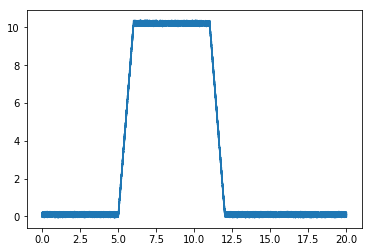

In [208]:
plt.plot(Time, Stg_X)
plt.show

In [ ]:
"""PSD_X[1:DataLength,1]= (TDMS.Aquire_Robert.Voltage.Data())
PSD_Y[1:DataLength,1]= (TDMS.Aquire_Robert.Voltage_0.Data())
Stg_X[1:DataLength,1]=(((TDMS.Aquire_Robert.Voltage_3.Data()) + 5.0204) / 0.1939)
Stg_Y[1:DataLength,1]= (((TDMS.Aquire_Robert.Voltage_4.Data()) + 5.0204) / 0.1939)"""

for i in range(0
    """%this part indexes the file name of whichever step of the loop you're
    %on. 
    if Maxtrials==1
        fullFilename = fullfile(pName, fNames);
    else
    fullFilename = fullfile(pName, fNames{i});
    end"""
    
    #TDMS = Read_TDMS(64,0,{''},fullFilename);
    TDMS = Read_TDMS(CL_AMT+trial)
    
    %now we go into that structure and get the parts of it we want to read
    %into our variables. the (:, 1:DataLength) is added in so that if you
    %choose to check only a part of your data rather than the entire length
    %of the trial, the dimensions will agree.
    PSD_X(1:DataLength,i)= (TDMS.Aquire_Robert.Voltage.Data(:,1:DataLength)); 
    PSD_Y(1:DataLength,i)= (TDMS.Aquire_Robert.Voltage_0.Data(:,1:DataLength));
    
    %the numbers 5.0204 and 0.1939 are just added in to correct the stage
    %position. you can verify that your stage position has read correctly
    %by typing 'plot(Stg_X)' into the command window after your trials
    %load.
    Stg_X(1:DataLength,i)=(((TDMS.Aquire_Robert.Voltage_3.Data(:,1:DataLength)) + 5.0204)./ 0.1939);
    Stg_Y(1:DataLength,i)= (((TDMS.Aquire_Robert.Voltage_4.Data(:,1:DataLength)) + 5.0204)./ 0.1939);
    
    %it is handy to have a time axis as well. Let's make one based off the
    %data acquisition rate and experiment length. 
    Time(:,1) = 1/aqrate:1/aqrate:DataLength/aqrate;
    
    %data is a noisy thing. let's smooth out the PSD signals using the
    %gaussian filter. Also, let's make sure that our PSD signal is starting
    %at zero by subtracting the mean of the first 0.1 s of the experiment
    %(usually equilibrium), which is supposed to average out to zero. We
    %will also multiply the PSD by -1 in order for the PSD to be positive
    %when dx/dt is positive. I wouldn't read too far into it, this is just
    %the way the data gets collected. 
    PSD_X(:,i) = ((smoothdata((PSD_X(:,i) - mean(PSD_X(1:2000, i))), 1, 'gaussian', 500)));
    PSD_Y(:,i) = ((smoothdata((PSD_Y(:,i) - mean(PSD_X(1:2000, i))), 1, 'gaussian', 500)));
    order = 5;
    framelen = 501;
    
    %let's correct the stage position to start at zero as well. 
    Stg_X(:,i)= (Stg_X(:,i) -  mean(Stg_X(1:2000,i)));
    Stg_Y(:,i)= (Stg_Y(:,i) - mean(Stg_Y(1:2000,i)));
    
    %finally, we derive the force from the PSD using the trap stiffness. 
    Force_X(:,i) = Trap_Stiffness .* PSD_X(:,i);
    Force_Y(:,i) = Trap_Stiffness .* PSD_Y(:,i);

# 1) Map Paths to Folders

Check experiment name, trial, and filename for each run.

data_dir= where raw tiff files are stored

saveto= where DDM analysis data will be saved

In [313]:
exp='20210330_5.8 AMT 75% actin 2x myosin'        #* this should be the *folder* that data was saved to in DDM step 1
exp_id ='75% actin 2x myosin j='                  #* this just helps save the ISF data, seperated by interval
filename= '1_561only_20min.nd2 - C=0'             #* this should be the *file* that data was saved to in DDM step 1
trial= filename.split('_')[0]         
saveto='X:\\Gregor L\\Confocal Videos\\'+exp+'\\DDM\\'+trial+'\\'  #* aquires data for fitting (file path from step 1)
new_saveto= 'X:\\Gregor L\\DDM_step2_'+exp+'\\'+trial+'\\'         #* filepath for saving plots with fits

print saveto
print new_saveto

X:\Gregor L\Confocal Videos\20210330_5.8 AMT 75% actin 2x myosin\DDM\1\
X:\Gregor L\DDM_step2_20210330_5.8 AMT 75% actin 2x myosin\1\


# 2) Fit Image Structure Functions to Determine Tau

3.1 Specify framerate and pixel size per micron of tiffs, load D vs time lag values.

In [4]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

from source.codeGen import *
import sys

def main(args):
    if len(args) == 1:
        source = args[0]
        gen = CodeGen(source)
    elif len(args) == 2:
        source = args[0]
        output = args[1]
        gen = CodeGen(source, output)
    else:
        print ">> Please input the source file ."
        exit()
    gen.generate()
if __name__ == "__main__":
    main(sys.argv[1:])

IOError: [Errno 2] No such file or directory: '-f'

3.2 Guess the background value of Image Structure Function.

<IPython.core.display.Javascript object>


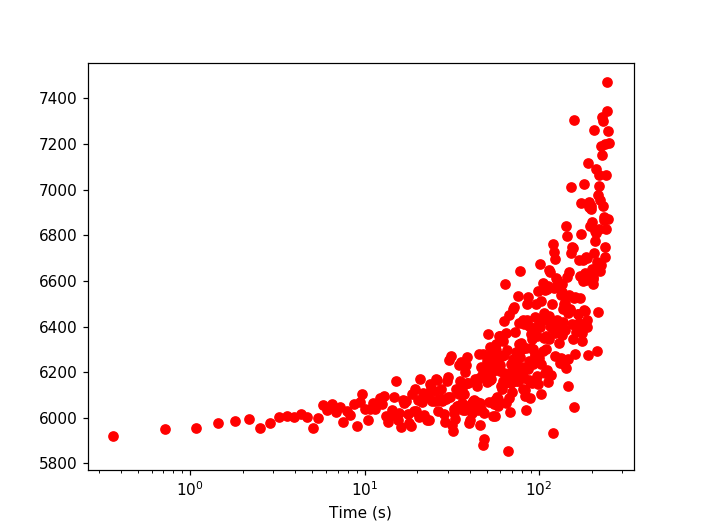

3.3 Fit! Change min/max/guess values of D curve parameters (amplitude, decay constant, background, stretching exponent) until theory matches data over a wide range of qs. Can also change end_time to cut off unreliable data at higher lag times.

In [329]:
def two_rounds_fitting(data, times):
    '''
    This function does two rounds of fitting. 
    First it uses SciPy's least-squares fitting:
        https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.leastsq.html
    Then, it uses the Levenberg-Marquardt method with the mpfit module. 
    '''

    pars,minp,maxp,lmin,lmax,fix = ddm.returnReasonableParams(d=data, bg=backg, double=False, fps=framerate)
    #* Parameters: 0-Amplitude, 1-TimeConst, 2-Background, 3-Alpha (stretching exp)
    
    #* fitting for amplitude
    minp[0]=0 #bottom of range
    maxp[0]=5000000 #top of range
    pars[0]=3000 #initial guess
        
    #* fitting for decay time (time constant)
    minp[1] = 0
    maxp[1] = 1000
    
    #* fitting for background
    minp[2]=0
    maxp[2]=100000
    pars[2]=backg 
    fix[2]= False #Fix bg
  
    #* fitting for alpha (stretching exponent)
    minp[3]=.4 
    maxp[3]=10 
    pars[3]=2 
    fix[3]= False #Fix alpha
    

    #* The ddm.newFitLeastsq function does not check whether the parameters are within the
    #   minimum and maximum bounds. It uses SciPy's optimize.leastsq. 
    fitparams_lsq,theory_lsq = ddm.newFitLeastsq(data,times,pars,minp,maxp,lmin,lmax,fix,logfit=False)
    newPars = fitparams_lsq.copy()
    
    #* saves the parameters chosen above
    params_data=np.vstack([minp[1:4],maxp[1:4],pars[1:4],fix[1:4]])
    np.savetxt('//Rae-40TB/AndersonLab-2020//Gregor L/save_params/'+exp+"_"+filename+"_"+frame_set[j]+'_params_data.csv', params_data, delimiter=',')
    
        
    
    #* We'll use the found parameters from SciPy's optimize.leastsq and feed them into the
    #   Levenberg-Marquardt function. Before we do so, we'll check that none of the found
    #   parameters are outside the min/max bounds. 
    for i,p in enumerate(fitparams_lsq):
        if p>maxp[i]:
            newPars[i] = maxp[i]*0.9
        if p<minp[i]:
            if p<0:
                newPars[i]=abs(p)
                if newPars[i]>maxp[i]:
                    newPars[i] = maxp[i]*0.9
                elif newPars[i]<minp[i]:
                    newPars[i] = minp[i]*1.1
            else:
                newPars[i] = minp[i]*1.1
                
    #Now use the Levenberg-Marquardt function. It returns the optimized paramters (fitparamsB), the 
    #  best fit (theoryB), any error codes, and the chi-squared value (the sum of squares of the error)
    fitparamsB, theoryB, errCodeB, chi2B = ddm.newFit(data,times,newPars,minp,maxp,lmin,lmax,fix,
                                                      logfit=False,quiet=True,factor=0.8)
    
    return fitparamsB, theoryB, chi2B


q_index = 10  # 10 usually works because it tends to fit well for all types of dynamics
                #this variable doesn't seem to effect anything

#end_time = 310 #this variable was replaced by 'last_times' for better fitting 
last_times = np.linspace(400, 2, num=len(q), dtype=np.int)

<IPython.core.display.Javascript object>


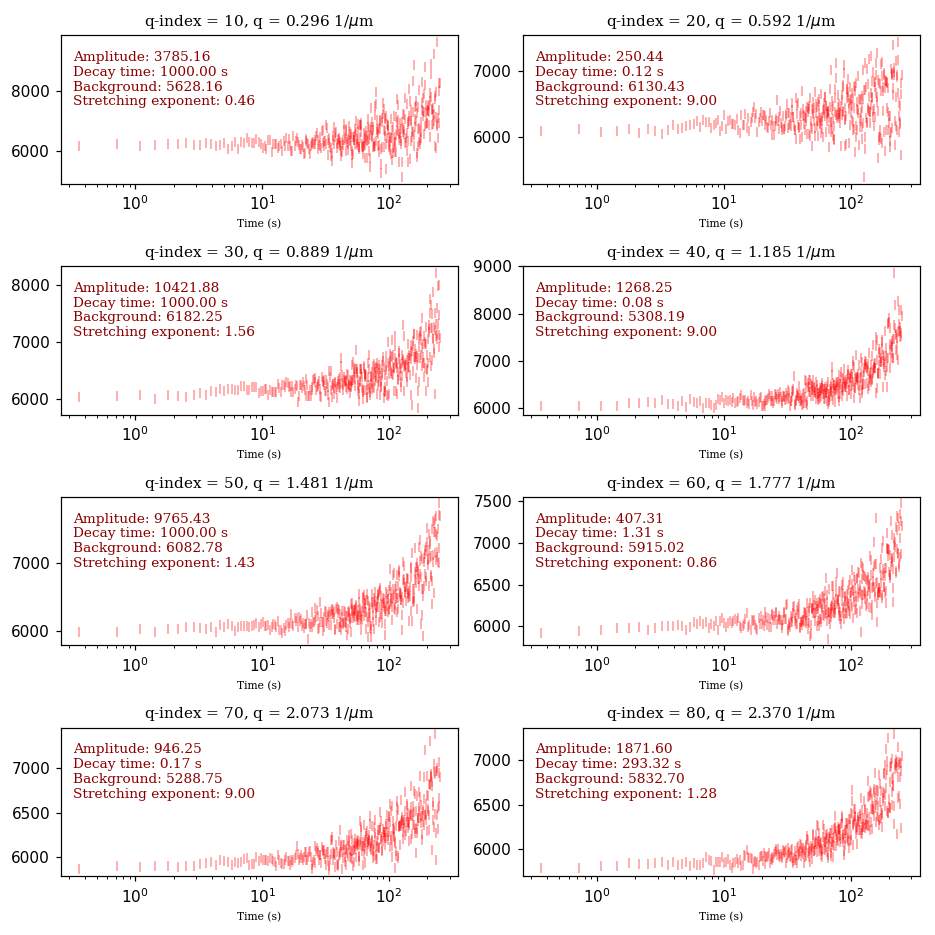

[520 519 518 517 516 515 514 513 512 511 510 509 508 507 506 505 504 503
 502 502 501 500 499 498 497 496 495 494 493 492 491 490 489 488 487 486
 485 485 484 483 482 481 480 479 478 477 476 475 474 473 472 471 470 469
 468 468 467 466 465 464 463 462 461 460 459 458 457 456 455 454 453 452
 451 451 450 449 448 447 446 445 444 443 442 441 440 439 438 437 436 435
 434 434 433 432 431 430 429 428 427 426 425 424 423 422 421 420 419 418
 417 417 416 415 414 413 412 411 410 409 408 407 406 405 404 403 402 401
 400 400]


In [330]:

%matplotlib notebook
plt.figure(figsize=(8.5,8.5)) #* Create figure of size 15x15 (inches)

#* change these to adjust fitting. end_num=520, start_num=400 usually works, but adjust as needed. (negative values work too)
end_num= 520
start_num= 400

for i,q_index in enumerate([10,20,30,40,50,60,70,80]): 
    #last_time=500
    last_times = np.linspace(end_num, start_num, num=len(q), dtype=np.int)
    last_time = last_times[q_index]
    fitparamsB, theoryB, chi2B = two_rounds_fitting(ravs[:last_time,q_index], times[:last_time])
    
    #* plotting parameters    
    font_plt = {'family': 'serif',
             'color':  'darkred',
             'weight': 'normal',
             'size': 9,
             }
    font_plt_ax = {'family': 'serif',
                'color':  'black',
                'weight': 'normal',
                'size': 10,
                }
    ax = plt.subplot(4,2,i+1)                         #* creating 4 subplots in a 2x2 grid
    ax.semilogx(times,ravs[:,q_index],'r|',alpha=0.4) #* alpha changes color intensity
    
#* if no plateaus are present, comment out the line below to remove the best fit line    
    #ax.plot(times[:len(theoryB)], theoryB, '-b',lw=1)
    
    ax.text(0.03,0.85,'Amplitude: %.2f' % (fitparamsB[0]),
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.text(0.03,0.75,'Decay time: %.2f s' % fitparamsB[1], 
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.text(0.03,0.65,'Background: %.2f' % fitparamsB[2], 
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.text(0.03,0.55,'Stretching exponent: %.2f' % (fitparamsB[3]), 
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes) 
    ax.set_xlabel("Time (s)", fontdict=font_plt_ax, fontsize=7)
    ax.set_title("q-index = %i, q = %.3f 1/$\mu$m" % (q_index, q[q_index]), fontdict=font_plt_ax)
    plt.tight_layout(pad=.75)
    
print (last_times)

# 4) Save Data
plt.savefig saves the snapshot of fits for 8 evenly spaced q-values plotted above

allResults contains all fitting parameters for all qs in the analysis

Final_Data is a csv file which contains data to plot example ISFs and tau vs q curves. Open this in origin for further analysis (creating nice plots, fitting tau vs q to find contraction speed, etc).

In [331]:
plt.savefig(new_saveto+filename+"_"+frame_set[j]+'_ISF fits.png') #saves the plots above

<IPython.core.display.Javascript object>


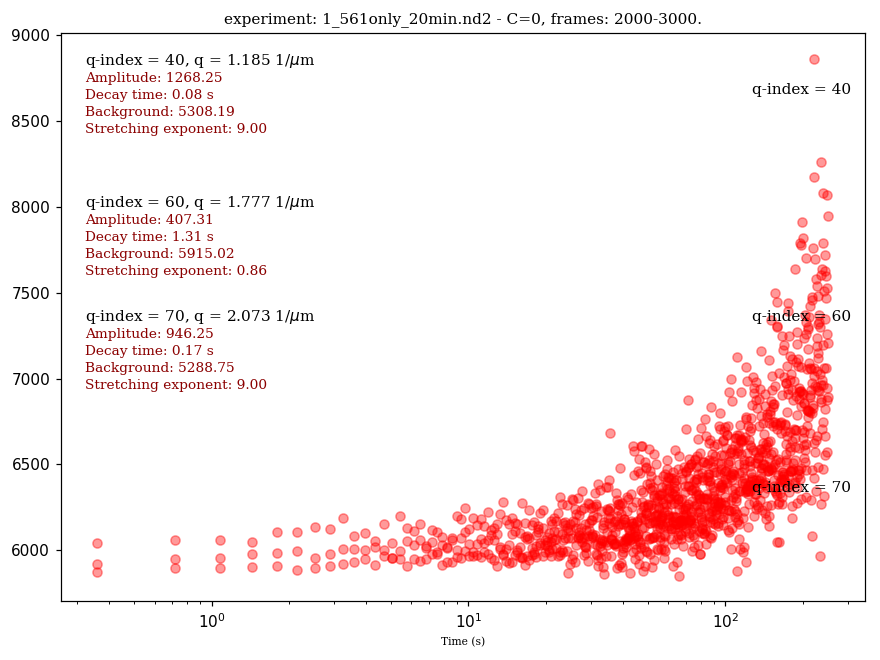

In [332]:
#* this code generates a summary plot that puts 3 of the plots above together on one figure
%matplotlib notebook
plt.figure(figsize=(8,6)) 
q_index = 10      #* "q_index = 10 usually works because it tends to fit well for all types of dynamics"
                  #* this variable doesn't seem to effect anything
    
for i,q_index in enumerate([40,60,70]):  #* the numbers in brackets e.g. [40,60,70] are the q_indices for the whatever 3 plots
                                         #    are chosen from the grid above. 
    #last_time=310
    last_times = np.linspace(end_num, start_num, num=len(q), dtype=np.int)
    last_time = last_times[q_index]
    fitparamsB, theoryB, chi2B = two_rounds_fitting(ravs[:last_time,q_index], times[:last_time])
    
    font_plt = {'family': 'serif',
            'color':  'darkred',
            'weight': 'normal',
            'size': 9,
            }
    font_plt_ax = {'family': 'serif',
               'color':  'black',
               'weight': 'normal',
               'size': 10,
              }
    ax = plt.subplot(1,1,1) 
    ax.semilogx(times,ravs[:,q_index],'ro',alpha=0.4) 

        #* "ax.plot(...)" below plots the fit lines, comment this out if there are no fits
    #ax.plot(times[:len(theoryB)], theoryB, '-b',lw=1)
    
    #* y_coor=... determines the location of text on the summary plot
    y_coor1=0.85
    y_coor2=0.82
    y_coor3=0.79
    y_coor4=0.77
    y_coor5=0.9
    if i==0: 
        y_coor=0.95
        y_coor1=y_coor-0.03
        y_coor2=y_coor-0.06
        y_coor3=y_coor-0.09
        y_coor4=y_coor-0.12
        y_coor5=0.90 #y_coor5=0.45 #
    elif i==1:
        y_coor=0.7
        y_coor1=y_coor-0.03
        y_coor2=y_coor-0.06
        y_coor3=y_coor-0.09
        y_coor4=y_coor-0.12
        y_coor5=0.5
    else:
        y_coor=0.5
        y_coor1=y_coor-0.03
        y_coor2=y_coor-0.06
        y_coor3=y_coor-0.09
        y_coor4=y_coor-0.12
        y_coor5=0.2 #y_coor5=0.74 #
        
    ax.text(0.03,y_coor,"q-index = %i, q = %.3f 1/$\mu$m" % (q_index, q[q_index]), fontdict=font_plt_ax,
            horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.text(0.86,y_coor5,"q-index = %i" % (q_index), fontdict=font_plt_ax,
            horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.text(0.03,y_coor1,'Amplitude: %.2f' % (fitparamsB[0]),
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.text(0.03,y_coor2,'Decay time: %.2f s' % fitparamsB[1], 
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.text(0.03,y_coor3,'Background: %.2f' % fitparamsB[2], 
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.text(0.03,y_coor4,'Stretching exponent: %.2f' % (fitparamsB[3]), 
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.set_xlabel("Time (s)", fontdict=font_plt_ax, fontsize=7)
    ax.set_title("experiment: "+filename+", frames: "+str(frame_set[j])+".", fontdict=font_plt_ax)
    plt.tight_layout(pad=.75)
    
plt.savefig(new_saveto+"summary_plot_"+filename+"_"+frame_set[j]+'_ISF fits.png')  #saves figure

In [143]:
print "check" 

check?


In [200]:
#* this saves all the numerical data (ngl, I have yet to actually use this data)
key_time = last_times[0]

fitparams = np.zeros((ravs.shape[1],7))
theory = np.zeros((ravs.shape[1],len(times[:key_time])))
tau = np.zeros_like(ravs[0,:])   #* decay time
amp = np.zeros_like(tau)         #* amplitude
bg = np.zeros_like(tau)          #* background
alph = np.zeros_like(tau)        #* alpha (stretching exponent)
chi2 = np.zeros_like(tau) 
#print two_rounds_fitting(ravs[:end_time,i], times[:end_time])

for i in range(1,len(tau)):
    fitparams[i], theory[i], chi2[i] = two_rounds_fitting(ravs[:key_time,i], times[:key_time])
    amp[i] = fitparams[i][0]
    tau[i] = fitparams[i][1]
    bg[i] = fitparams[i][2]
    alph[i] = fitparams[i][3]
    
    
allResults = {}
allResults['fitparams_'+filename] = fitparams
allResults['theory_'+filename] = theory
allResults['chi2_'+filename] = chi2
allResults['ravs_'+filename] = ravs
allResults['dts'] = dts

pickle.dump(allResults, open(saveto+filename+"_allresults.p",'wb'))

ravs1=ravs[:,30]
ravs2=ravs[:,50]
ravs3=ravs[:,80]
a=[0]*(len(times)-len(q))
b=[0]*(len(times)-len(tau))
qs=np.append(q,a)
taus=np.append(tau,b)

Final_Data=np.transpose(np.vstack([times,ravs1,ravs2,ravs3,qs,taus]))
np.savetxt(new_saveto+'Final_Data_'+filename+"_"+frame_set[j]+'_.csv', Final_Data, delimiter=',')

<IPython.core.display.Javascript object>


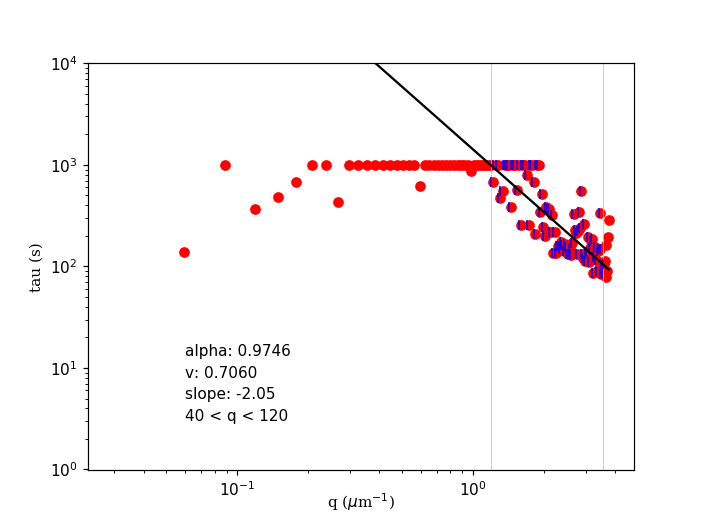

[0.02962068 0.05924135 0.08886203 0.11848271 0.14810338 0.17772406
 0.20734474 0.23696541 0.26658609 0.29620677 0.32582744 0.35544812
 0.3850688  0.41468947 0.44431015 0.47393083 0.5035515  0.53317218
 0.56279285 0.59241353 0.62203421 0.65165488 0.68127556 0.71089624
 0.74051691 0.77013759 0.79975827 0.82937894 0.85899962 0.8886203
 0.91824097 0.94786165 0.97748233 1.007103   1.03672368 1.06634436
 1.09596503 1.12558571 1.15520639 1.18482706 1.21444774 1.24406842
 1.27368909 1.30330977 1.33293045 1.36255112 1.3921718  1.42179248
 1.45141315 1.48103383 1.51065451 1.54027518 1.56989586 1.59951653
 1.62913721 1.65875789 1.68837856 1.71799924 1.74761992 1.77724059
 1.80686127 1.83648195 1.86610262 1.8957233  1.92534398 1.95496465
 1.98458533 2.01420601 2.04382668 2.07344736 2.10306804 2.13268871
 2.16230939 2.19193007 2.22155074 2.25117142 2.2807921  2.31041277
 2.34003345 2.36965413 2.3992748  2.42889548 2.45851616 2.48813683
 2.51775751 2.54737819 2.57699886 2.60661954 2.63624021 2.66586

C:\Users\adminranderson\Anaconda2\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in power


In [201]:
#* this code plots Tau vs q-values. Tau is the time where a plateau begins in the ISF. 
fig = plt.figure();
ax = plt.gca()
ax.loglog(q[1:],tau[:],color='r',marker='o',linewidth='0')
minq=40
maxq=120
qmin=q[minq]
qmax=q[maxq]
plt.axvline(x=qmin, color='silver', linewidth='0.5')
plt.axvline(x=qmax, color='silver', linewidth='0.5')

tvq_q = q[1:]
print(tvq_q)
tvq_t = tau[:]
print(len(tvq_t))

#* the "savetxt(..)" below saves the raw tau vs q data to seperate csv files; use this data to make plots in origin
np.savetxt('//Rae-40TB/AndersonLab-2020//Gregor L//tvq data//'+exp+'//'+trial+'/'+'_tvq_data_'+exp_id+str(j)+'_'+filename+'.csv', np.c_[isf_times, isf_data], delimiter=',')

b = np.where((qs>=qmin)&(qs<=qmax)) #b=range of q where we want to fit
ax.plot(qs[b[0]],tau[b[0]],'b|',label='good q range')

a = np.polyfit(np.log(q[b[0]]),np.log(tau[b[0]]), 1) #* a=matrix holding coefficients from fitting tau vs q in range set by b
print a
print a[1]
print a[0]
slope = a[0]
print slope
coef1 = np.exp(a[1])
alpha = -2./slope    #* scaling exponent; should we be saving these? 
v = (1.0/coef1)*1000 
tau_fit = coef1*(q**(-2.0/alpha))
ax.plot(q, tau_fit, '-k')

ax.text(0.06,13, "alpha: %.4f" % alpha)
ax.text(0.06,8, "v: %.4f" % v)
ax.text(0.06,5,"slope: %.2f" % slope)
ax.text(0.06,3, "%i < q < %i" % (minq, maxq))

ax.set_xlabel("q ($\mu$m$^{-1}$)", fontdict=font_plt_ax, labelpad=-5)
ax.set_ylabel("tau (s)", fontdict=font_plt_ax)
#ax.set_xlim(qmin,qmax)   #* zooms-in on the fitting range
ax.set_ylim(.99,10000)

plt.savefig(new_saveto+'tau_vs_q_'+filename+"_"+frame_set[j]+'_ISF fits.png') #* saves the Tau vs q figure